In [1]:
import numpy as np

filename = "iris.csv"

numSamples = 150
numFeatures = 4

## Point1: Load the Dataset

In [2]:
def loadIrisDataset(path):
    rawData = np.genfromtxt(path, delimiter=',', dtype = "str")
    
    #extract the 4 features and insert them into D
    D = rawData[:, 0:4] #D shape: (150, 4)
    D = np.array(D, np.float32).T  #Dont't do reshape! Because I want onr row= 150 samples of the same feature! .reshape((numFeatures, numSamples))

    #L_string = rawData[:, 4].reshape((numSamples, 1))  
    classLabels = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    
    L = np.array([classLabels[name] for name in rawData[:, 4]], dtype=int) #.reshape((numSamples, 1)) #I want a column vector of shape (150, 1)
    

    return D, L

In [3]:
D, L = loadIrisDataset(filename)

In [4]:
L[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [5]:
D[0, :]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9], dtype=float32)

In [6]:
print("D shape:", D.shape)
print("L shape:", L.shape)

D shape: (4, 150)
L shape: (150,)


D has 4 rows (one row = one different feature), and 150 columns (1 column = 1 sample)
L is a row vector having all the class labels
D[i, j] -> i identifies the the FEATURE (0 to 3), j identifies the SAMPLE (0 to 149)

In [7]:
print("first sample, first feature:", D[0, 0])
print("first sample, second feature:", D[1, 0])
print("first element, third feature:", D[2, 0])
print("first element, fourth feature:", D[3, 0])
print("first element, class Label:", L[0])

first sample, first feature: 5.1
first sample, second feature: 3.5
first element, third feature: 1.4
first element, fourth feature: 0.2
first element, class Label: 0


In [8]:
finalList = []
for row in D:
    finalList.append(row)
finalList.append(L)

finalList

[array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9], dtype=float32),
 array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
        3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3

In [9]:
for row in finalList:
    print(row[1])

4.9
3.0
1.4
0.2
0


## Point 2: Visualizing DataSet

In [10]:
import matplotlib.pyplot as plt

for i in range(len(finalList[:numFeatures])): #iterate just over D
    for j in range(numSamples):
        print(f"FEATURE: {finalList[i][j]}, LABEL: {finalList[-1][j]}")
    

FEATURE: 5.099999904632568, LABEL: 0
FEATURE: 4.900000095367432, LABEL: 0
FEATURE: 4.699999809265137, LABEL: 0
FEATURE: 4.599999904632568, LABEL: 0
FEATURE: 5.0, LABEL: 0
FEATURE: 5.400000095367432, LABEL: 0
FEATURE: 4.599999904632568, LABEL: 0
FEATURE: 5.0, LABEL: 0
FEATURE: 4.400000095367432, LABEL: 0
FEATURE: 4.900000095367432, LABEL: 0
FEATURE: 5.400000095367432, LABEL: 0
FEATURE: 4.800000190734863, LABEL: 0
FEATURE: 4.800000190734863, LABEL: 0
FEATURE: 4.300000190734863, LABEL: 0
FEATURE: 5.800000190734863, LABEL: 0
FEATURE: 5.699999809265137, LABEL: 0
FEATURE: 5.400000095367432, LABEL: 0
FEATURE: 5.099999904632568, LABEL: 0
FEATURE: 5.699999809265137, LABEL: 0
FEATURE: 5.099999904632568, LABEL: 0
FEATURE: 5.400000095367432, LABEL: 0
FEATURE: 5.099999904632568, LABEL: 0
FEATURE: 4.599999904632568, LABEL: 0
FEATURE: 5.099999904632568, LABEL: 0
FEATURE: 4.800000190734863, LABEL: 0
FEATURE: 5.0, LABEL: 0
FEATURE: 5.0, LABEL: 0
FEATURE: 5.199999809265137, LABEL: 0
FEATURE: 5.199999809

In [11]:
x = finalList[:4]
y = finalList[-1]
x[0][0]

5.1

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:

def densityFeaturePlots(x, y):
    labelColors = {0: "red", 1: "green", 2: "blue"}
    classLabels = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
    featuresNames = {0: 'Sepal length', 1: 'Sepal width', 2: 'Petal length', 3: 'Petal width'}
    for i in range(numFeatures):
        plt.figure(figsize=(6,4))
        for label in labelColors:
            sample_with_that_class = x[i][ y == label]
            #print(sample_with_that_class)
            plt.hist(x=sample_with_that_class, color=labelColors[label], alpha= 0.7, density=True, label=f"{classLabels[label]}", edgecolor="black")
            plt.legend()  # Mostra la legenda

        plt.title(f"Feature {featuresNames[i]} Distribution")
        plt.xlabel(featuresNames[i])
        plt.ylabel("Density")
        plt.show()

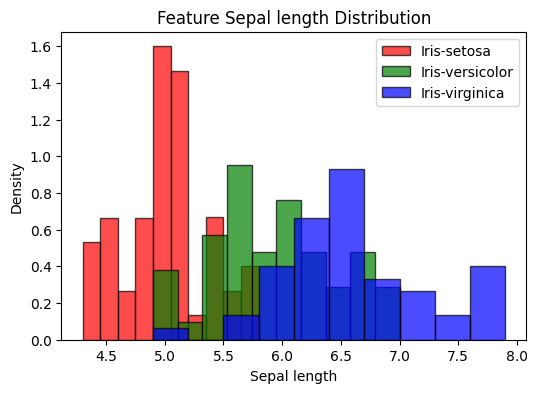

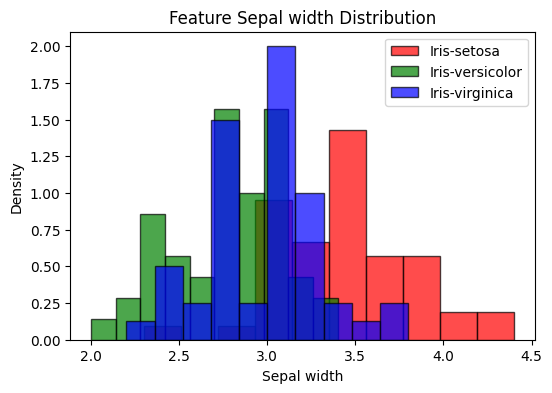

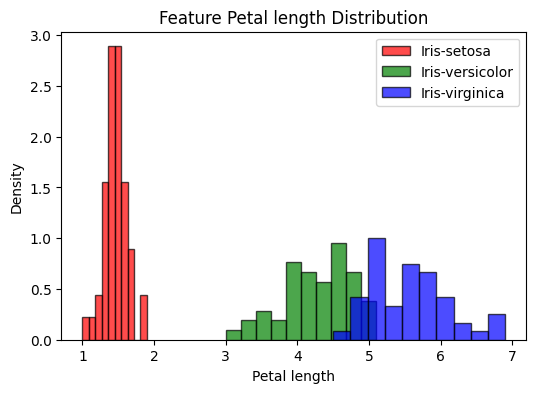

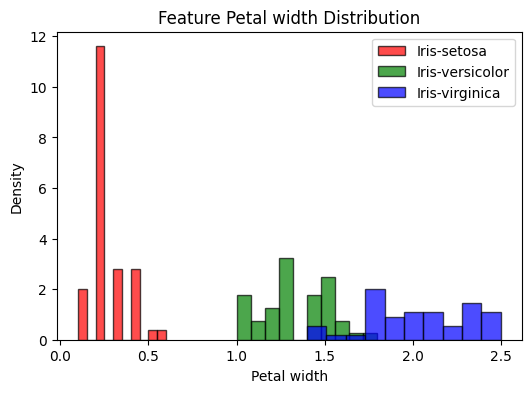

In [22]:
#Plot the four density histograms
densityFeaturePlots(x, y)

We can observe that there is large overlap for the first two features, whereas values for the third and
fourth features of iris-setosa are well separated from those of the other two flower families.

We now consider pairs of values and visualize the scatter plots of the different feature pairs for each class.

In [24]:

def scatterPlots(x, y):
    #I select feature i and feature j, with i different from j and plot them on the 2 axis of every scatter plot chart

    #rows, cols for making the subplot
    cols = 4
    rows = 4

    labelColors = {0: "red", 1: "green", 2: "blue"}
    classLabels = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
    featuresNames = {0: 'Sepal length', 1: 'Sepal width', 2: 'Petal length', 3: 'Petal width'}

    #subplot creation
    fig, plots = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*6, rows*4))
    plots = plots.flatten()   #the 2D axes array becomes a 1D array in order to access each ax in a more straighforward way during the loop

    subplotCounter = 0
    for i in range(numFeatures):
        for j in range(numFeatures):
            if j == i: continue

            #choose the subplot
            subplot = plots[subplotCounter]
            subplotCounter+=1

            #plt.scatter accepts x and y vectors
            for label in labelColors:
                xFeature = x[i][ y == label]
                yFeature = x[j][ y == label]
                subplot.scatter(xFeature, yFeature, color= labelColors[label], alpha=0.7,  label=f"{classLabels[label]}", edgecolor="black")

            subplot.set_xlabel(featuresNames[i])
            subplot.set_ylabel(featuresNames[j])
            subplot.legend()
            subplot.set_title(f"Scatter plot: {featuresNames[i]} vs {featuresNames[j]}")

        subplot = plots[subplotCounter]
        subplotCounter+=1
        for label in labelColors:
            sample_with_that_class = x[i][ y == label]
            subplot.hist(x=sample_with_that_class, color=labelColors[label], alpha= 0.7, density=True, label=f"{classLabels[label]}", edgecolor="black")
            subplot.legend()
            subplot.set_title(f"Feature {featuresNames[i]} Distribution")
            subplot.set_xlabel(featuresNames[i])
            subplot.set_ylabel("Density")

    plt.tight_layout(pad=3) #add padding between subplots to distance between eachother
    plt.show()

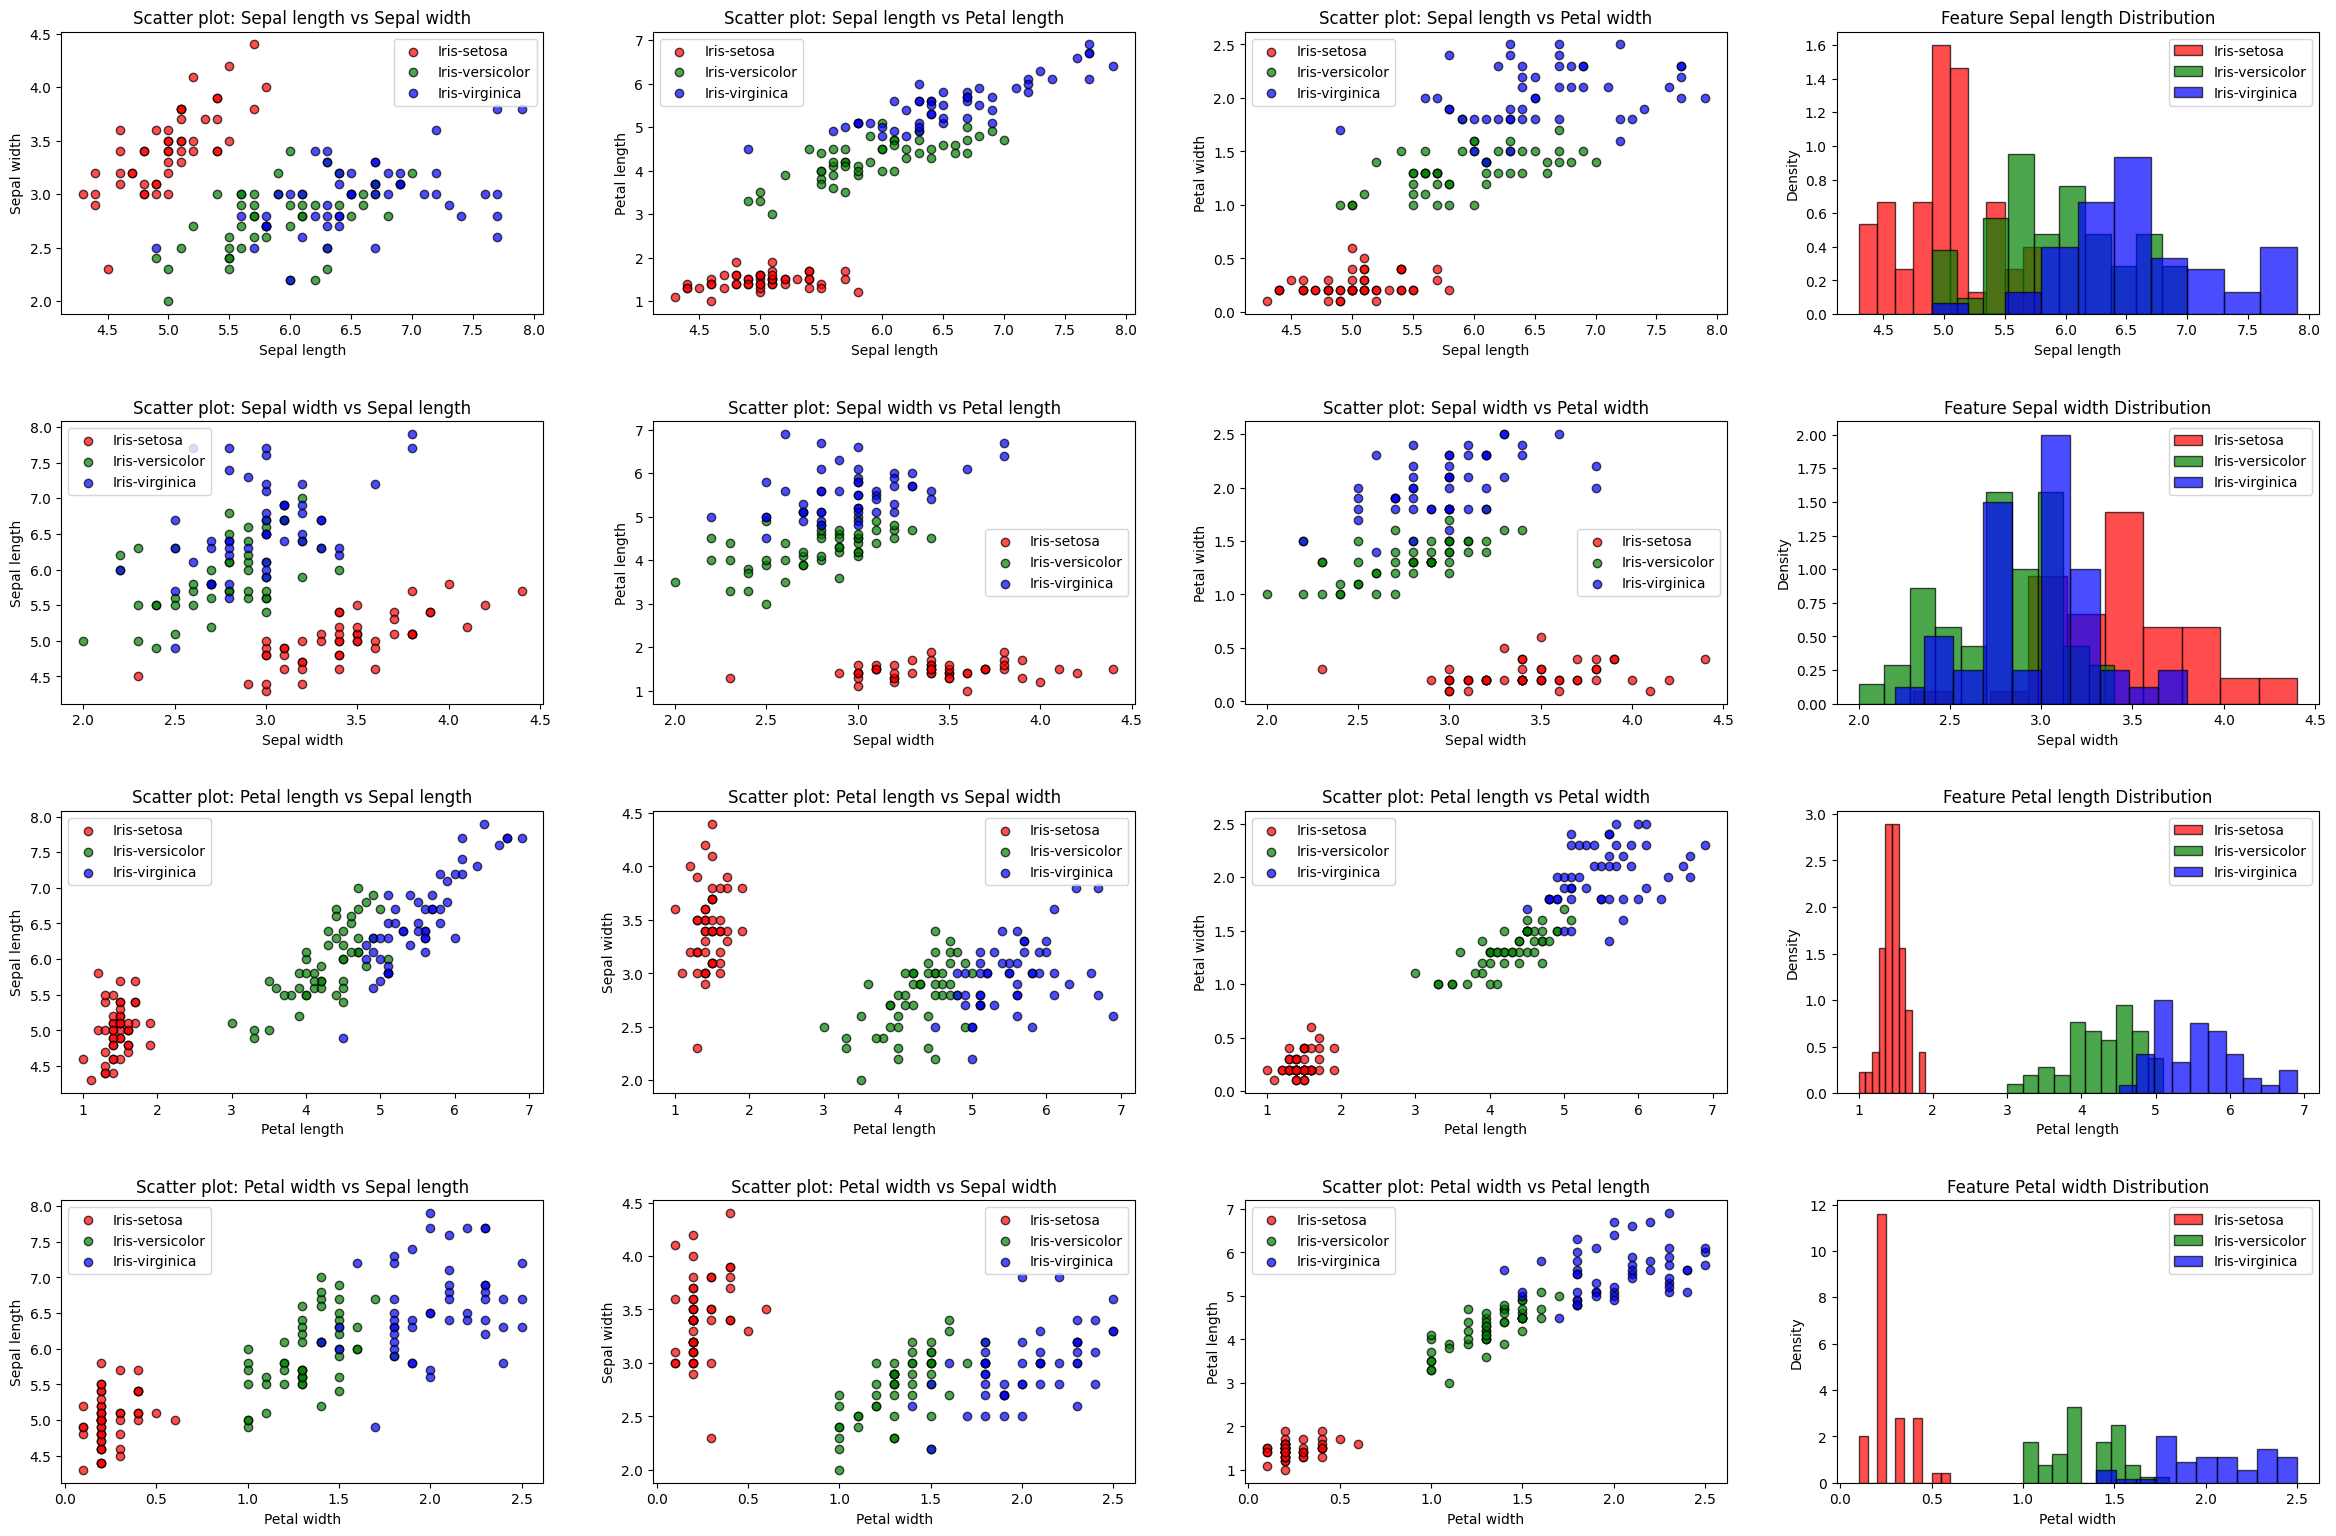

In [25]:
#Plot the sixteen scatter plots
scatterPlots(x, y)

## Point 3: Statistics Computation

### Dataset Mean

In [15]:
D.shape

(4, 150)

The for loop is, in general, slow. Numpy allows
computing the mean of an array through the method .mean. The method allows specifying an axis —
for 2-D arrays, axis = 0 allows computing the mean over rows, whereas axis = 1 allows computing
the means over columns

In [16]:
mu = D.mean(axis=1) #over columns
mu

array([5.8433347, 3.0573332, 3.7580001, 1.1993335], dtype=float32)

In [17]:
mu.shape

(4,)

Pay attention to the shape of D.mean(1): it’s a 1-D array, thus we convert it to a column vector through
the .reshape method

In [18]:
mu = mu.reshape((mu.shape[0], 1))
mu

array([[5.8433347],
       [3.0573332],
       [3.7580001],
       [1.1993335]], dtype=float32)

In [19]:
mu.shape

(4, 1)

We now exploit broadcasting to **center the data**, i.e. to **remove the mean from all points**. Notice that we want the mean to be a column vector, so we first reshape it.

In [20]:
DC = D - mu #D centered, so with every element - mu
print(f"Before centering: {D[0][0:10]}\nAfter centering: {DC[0][0:10]}")

Before centering: [5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9]
After centering: [-0.7433348  -0.9433346  -1.1433349  -1.2433348  -0.8433347  -0.44333458
 -1.2433348  -0.8433347  -1.4433346  -0.9433346 ]


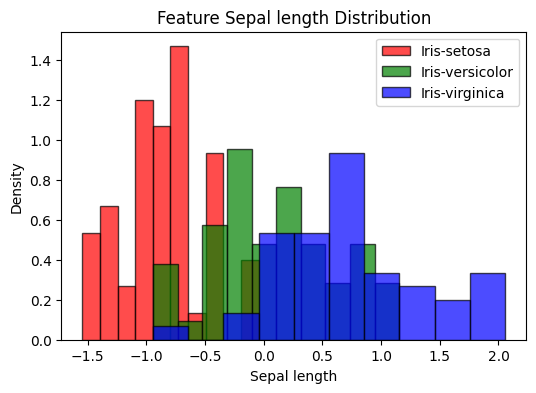

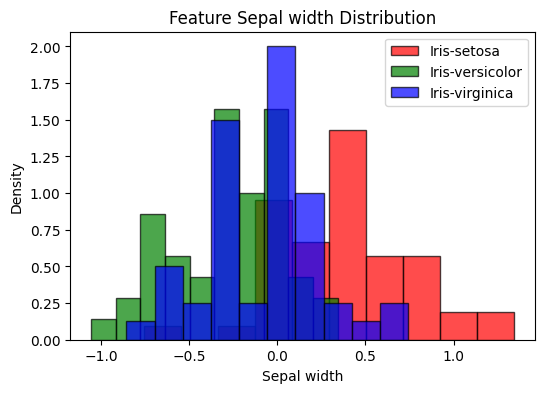

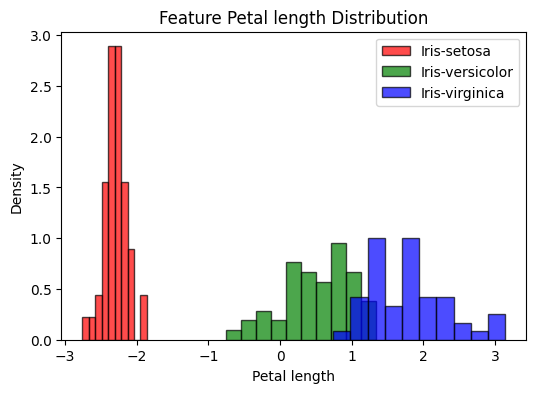

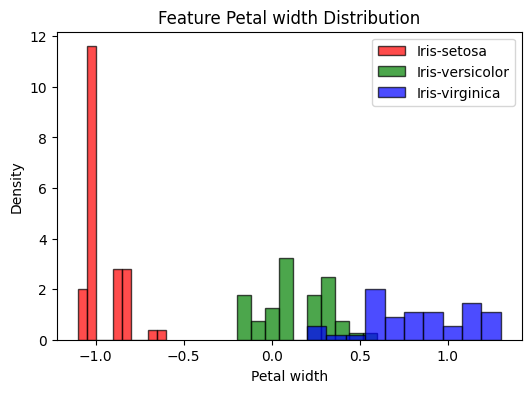

In [26]:
#Now I plot again the data that is now centered (the D vector changes)
x = DC

densityFeaturePlots(x, y)

Since the x are now centered, the x axis range is significantly smaller in the four plots

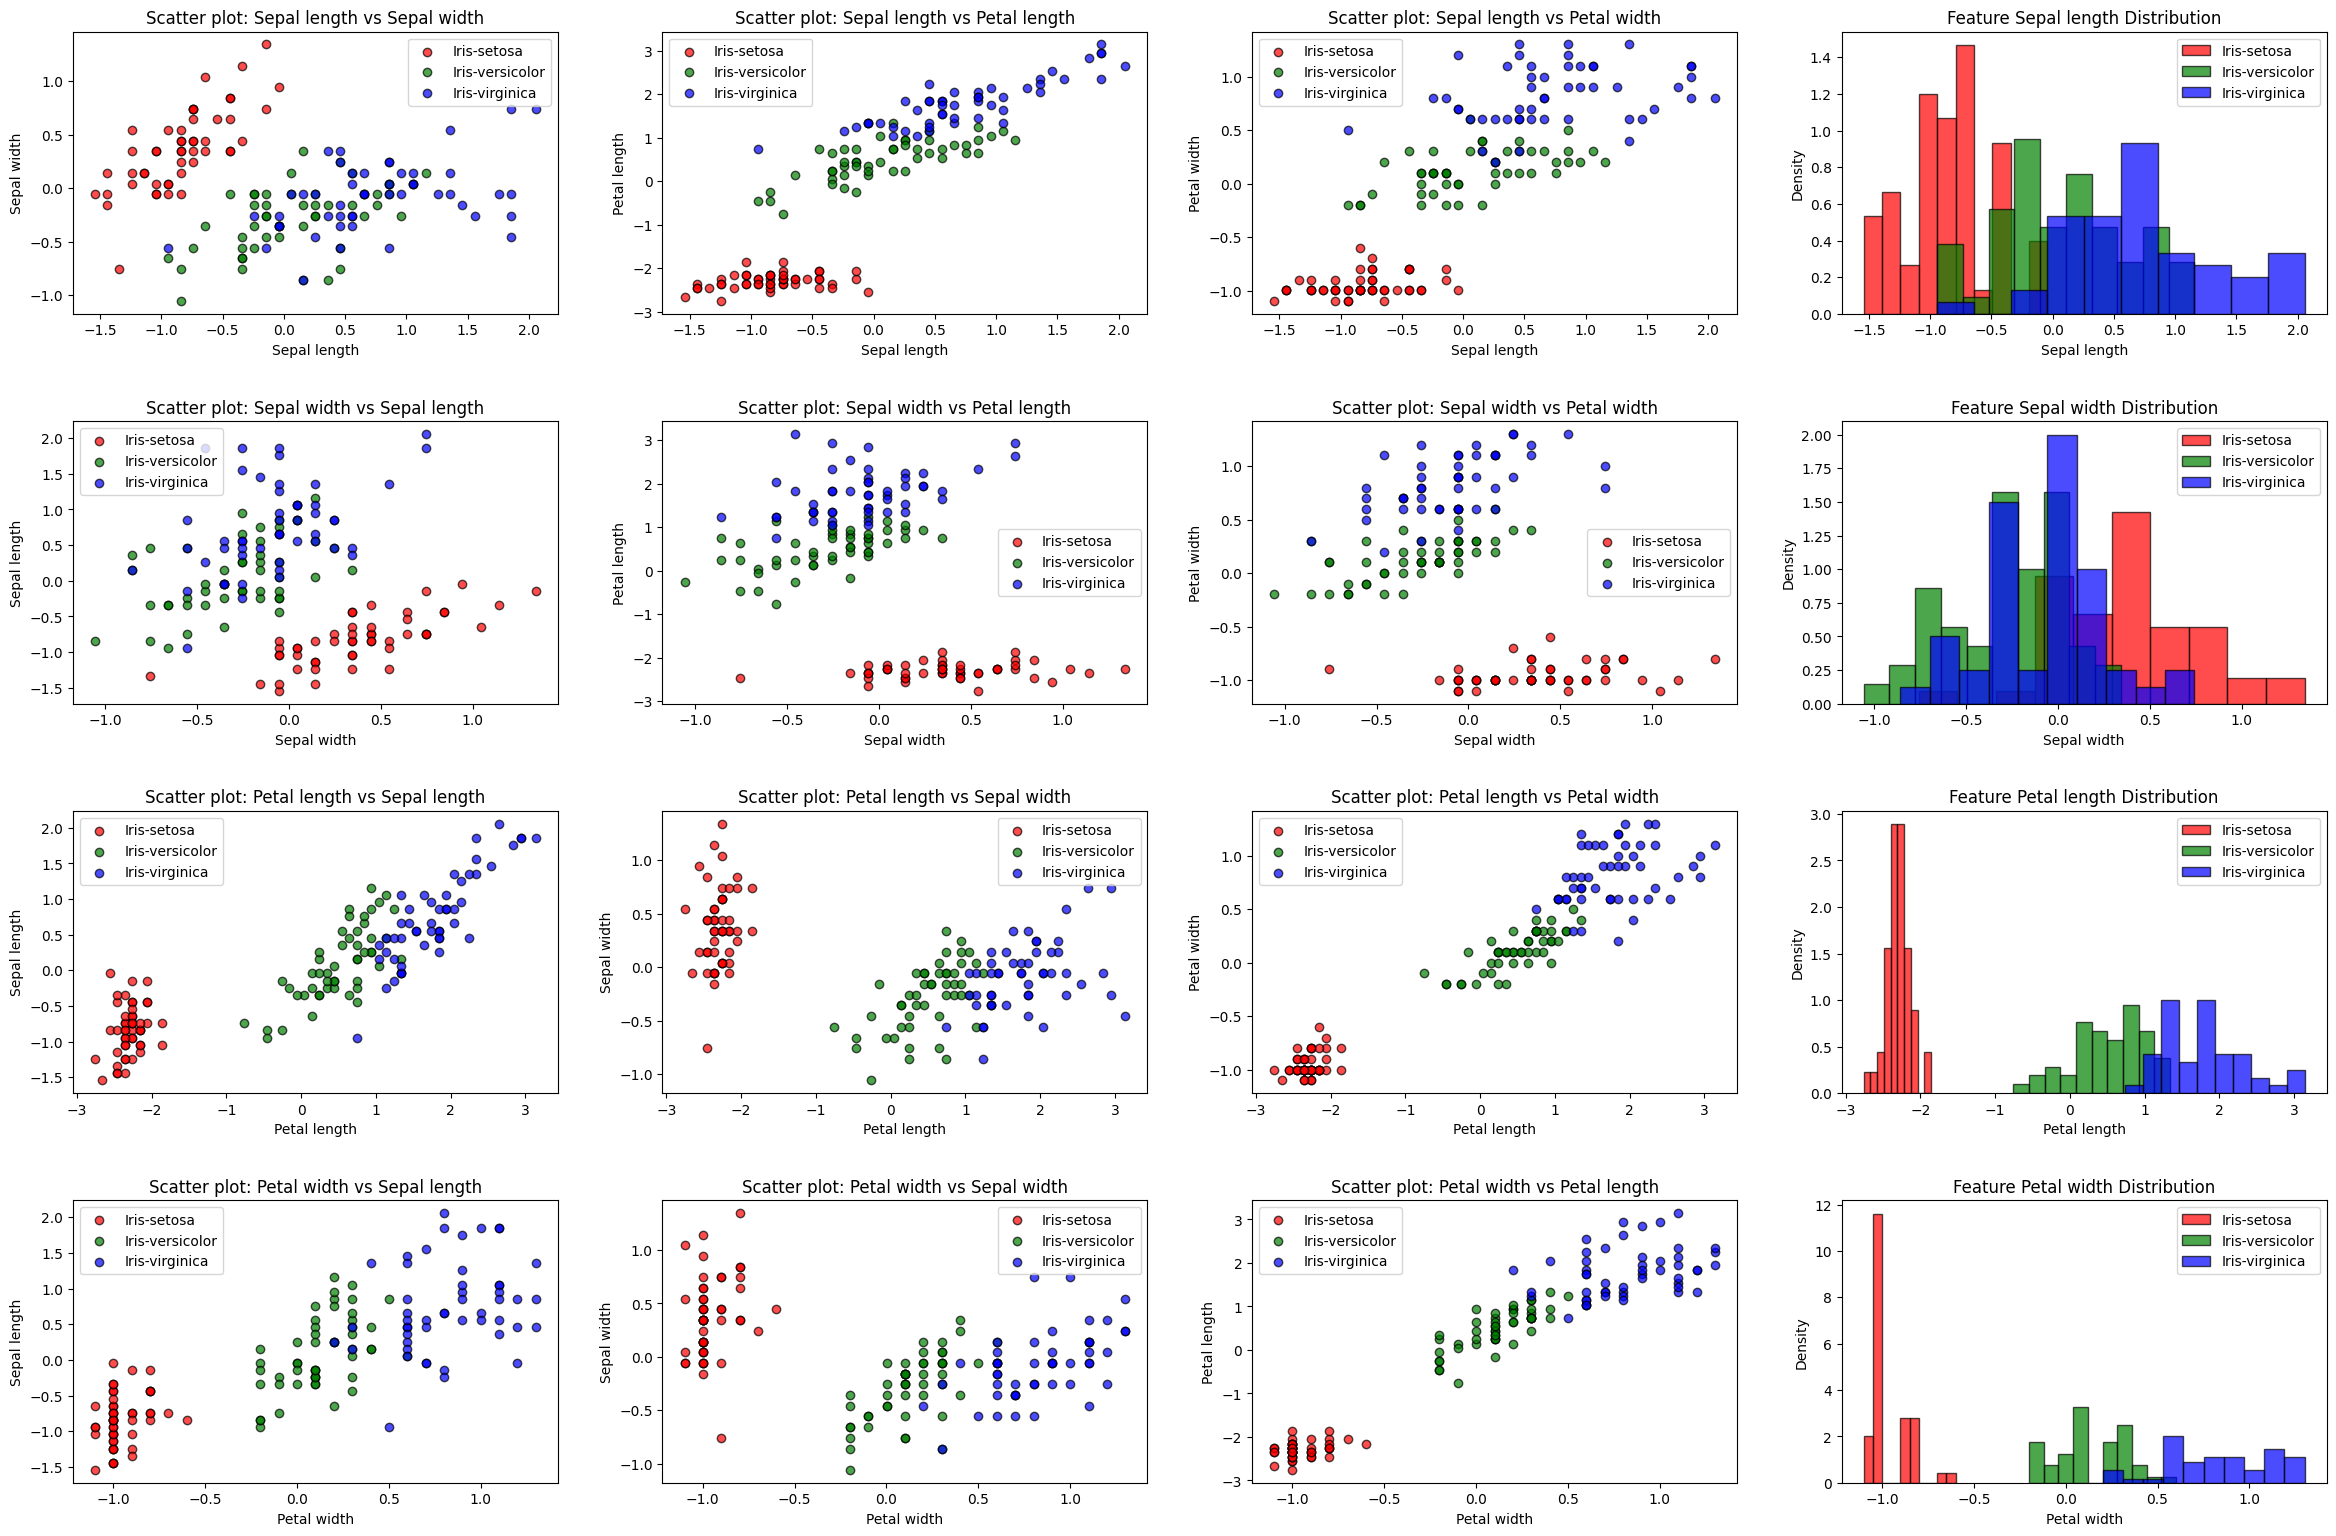

In [27]:
#Now I plot again the 16 scatterplots
x = DC
scatterPlots(x, y)

Now both the y and the x axis in the scatter plots have way smaller ranges since all the features values are centered.

### Covariance Matrix

The standard way of computing the covariance would be: <br> 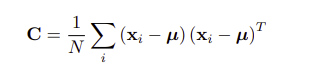

We can compute the covariance matrix using a for loop: <br>
```python
C = 0
for i in range(D.shape[1]):
C += (D[:, i:i+1] - mu) @ (D[:, i:i+1] - mu).T
C = C / float(D.shape[1])
``` 
<br>
Also in this case, the loop is slow. We can observe that we can arrange computations to express the
covariance matrix as: <br>

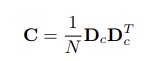

where Dc is the centered D numpy vector. <br>
In python:
```python
C = (DC @ DC.T) / float(D.shape[1])
```
where ```DC = D - mu```

In [36]:
#Compute the Covariance Matrix C using DC = D - mu
C = (DC @ DC.T) / float(D.shape[1])     #the function np.cov(...) does this

In [30]:
C.shape

(4, 4)

The shape of the Covariance Matrix is (4,4) (it's always a square matrix) since we have four features and we compute the covariance for each **pair** of features!

In [31]:
C

array([[ 0.6811218 , -0.0421511 ,  1.2658201 ,  0.512829  ],
       [-0.0421511 ,  0.1887129 , -0.32745862, -0.12082852],
       [ 1.2658201 , -0.32745862,  3.0955045 ,  1.2869717 ],
       [ 0.512829  , -0.12082852,  1.2869717 ,  0.577133  ]],
      dtype=float32)

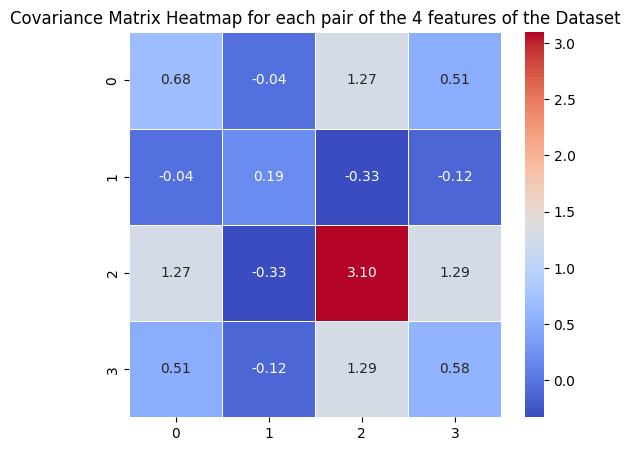

In [34]:
#Better representation with seaborn
#Seaborn function heatmap is more optimized than motplotlib function imshow so I use seaborn
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(C, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Covariance Matrix Heatmap for each pair of the 4 features of the Dataset")
plt.show()

### Variance 

The variance corresponds to the **diagonal of the covariance matrix**, and is the square of the standard deviation. <br>
Both the variance and standard deviation represent the dispersion of a feature with respect to the class mean, i.e., larger variance implies that, on average, the squared distance of samples from the dataset mean is larger, whereas a small variance
indicates that samples are closer to the dataset mean

In [38]:
var = DC.var(1)
var

array([0.68112236, 0.18871285, 3.095504  , 0.5771332 ], dtype=float32)

In [44]:
#Extraction of variances from the Covariance matrix by iterating on the diagonal
for i in range(C.shape[0]):
    for j in range(C.shape[1]):
        if i == j: print(C[i, j])

0.6811218
0.1887129
3.0955045
0.577133


In [46]:
#Standard Dev:
std = DC.std(1)
std

array([0.82530135, 0.43441093, 1.7594044 , 0.75969285], dtype=float32)

Again, pay attention that the results are 1-D vector, if we need column vectors we need to reshape the
results.